# PyTorch LSTM Tutorial
https://www.geeksforgeeks.org/deep-learning/long-short-term-memory-networks-using-pytorch/

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 1) Datensatz erzeugen (Sinus)

In [ ]:
t = np.linspace(0, 100, 1000, dtype=np.float32)   # 1000 Zeitpunkte
data = np.sin(t)                                  # Zielsignal
seq_len = 10                                      # Fensterlänge

def create_sequences(series, seq_len):
    X, y = [], []
    for i in range(len(series) - seq_len):
        X.append(series[i : i + seq_len])
        y.append(series[i + seq_len])
    # → Shapes:  (samples, seq_len, 1)   und   (samples, 1)
    return (torch.tensor(np.array(X)[:, :, None]),   # inputs
            torch.tensor(np.array(y)[:,  None]))

X, y = create_sequences(data, seq_len)

# 2) LSTM-Modell definieren

Epoch  10 – Loss: 0.2486
Epoch  20 – Loss: 0.1156
Epoch  30 – Loss: 0.0321
Epoch  40 – Loss: 0.0066
Epoch  50 – Loss: 0.0028
Epoch  60 – Loss: 0.0008
Epoch  70 – Loss: 0.0004
Epoch  80 – Loss: 0.0001
Epoch  90 – Loss: 0.0001
Epoch 100 – Loss: 0.0000


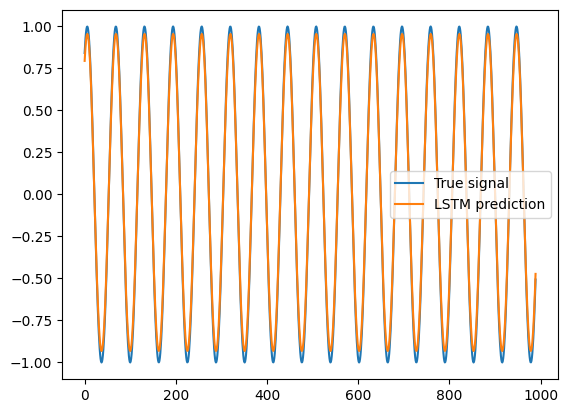

In [1]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=100, layers=1, output_dim=1):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, layers, batch_first=True)
        self.fc   = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, hc=None):
        out, hc = self.lstm(x, hc)        # out: (batch, seq_len, hidden)
        out     = self.fc(out[:, -1, :])  # letztes Time-Step -> Dense
        return out, hc

model = SimpleLSTM()
loss_fn  = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# ------------------------------------------------------------------
# 3) Training
# ------------------------------------------------------------------
hc = None
for epoch in range(1, 101):
    model.train()
    optimizer.zero_grad()

    pred, hc = model(X, hc)
    loss = loss_fn(pred, y)
    loss.backward()
    optimizer.step()

    # Hidden-State vom Graph trennen
    hc = tuple(h.detach() for h in hc)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d} – Loss: {loss.item():.4f}")

# ------------------------------------------------------------------
# 4) Vorhersage & Plot
# ------------------------------------------------------------------
model.eval()
with torch.no_grad():
    forecast, _ = model(X)
forecast = forecast.numpy().flatten()

plt.plot(data[seq_len:], label="True signal")
plt.plot(forecast, label="LSTM prediction")
plt.legend()
plt.show()